# Deep Learning Indonesia.AI
Pertemuan - Final Project

# Import Library

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

plt.style.use('ggplot')

# Load Datasets

## Datasets Information
In [Cortez and Morais, 2007], the output 'area' was first transformed with a ln(x+1) function.
Then, several Data Mining methods were applied. After fitting the models, the outputs were
post-processed with the inverse of the ln(x+1) transform. Four different input setups were
used. The experiments were conducted using a 10-fold (cross-validation) x 30 runs. Two
regression metrics were measured: MAD and RMSE. A Gaussian support vector machine (SVM) fed
with only 4 direct weather conditions (temp, RH, wind and rain) obtained the best MAD value:
12.71 +- 0.01 (mean and confidence interval within 95% using a t-student distribution). The
best RMSE was attained by the naive mean predictor. An analysis to the regression error curve
(REC) shows that the SVM model predicts more examples within a lower admitted error. In effect,
the SVM model predicts better small fires, which are the majority.

### Attribute documentation

No | Name | Description
:---:|---|---
1 | X | x-axis spatial coordinate within the Montesinho park map: 1 to 9
2 | Y | y-axis spatial coordinate within the Montesinho park map: 2 to 9
3 | month |  month of the year: 'jan' to 'dec'
4 |  day | day of the week: 'mon' to 'sun'
5 | FFMC | FFMC index from the FWI system: 18.7 to 96.20
6 | DMC | DMC index from the FWI system: 1.1 to 291.3
7 | DC | DC index from the FWI system: 7.9 to 860.6
8 | ISI | ISI index from the FWI system: 0.0 to 56.10
9 | temp | temperature in Celsius degrees: 2.2 to 33.30
10 | RH |  relative humidity in %: 15.0 to 100
11 | wind  | wind speed in km/h: 0.40 to 9.40
12 | rain | outside rain in mm/m2 : 0.0 to 6.4
13 | area | he burned area of the forest (in ha): 0.00 to 1090.84 (this output variable is very skewed towards 0.0, thus it may, make sense to model with the logarithm transform).

In [2]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/forest-fires/forestfires.csv')

In [3]:
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


# Exploratory Data Analysis

In [4]:
print(f'Total Data : {df.shape[0]}')
print(f'Total Attribute : {df.shape[1]}')

Total Data : 517
Total Attribute : 13


## Check Information data

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


### Description

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
X,517.0,4.669246,2.313778,1.0,3.0,4.00,7.00,9.00
Y,517.0,4.299807,1.229900,2.0,4.0,4.00,5.00,9.00
FFMC,517.0,90.644681,5.520111,18.7,90.2,91.60,92.90,96.20
DMC,517.0,110.872340,64.046482,1.1,68.6,108.30,142.40,291.30
DC,517.0,547.940039,248.066192,7.9,437.7,664.20,713.90,860.60
ISI,517.0,9.021663,4.559477,0.0,6.5,8.40,10.80,56.10
temp,517.0,18.889168,5.806625,2.2,15.5,19.30,22.80,33.30
RH,517.0,44.288201,16.317469,15.0,33.0,42.00,53.00,100.00
wind,517.0,4.017602,1.791653,0.4,2.7,4.00,4.90,9.40
rain,517.0,0.021663,0.295959,0.0,0.0,0.00,0.00,6.40


### Check Missing Value

In [7]:
df.isna().sum()

X        0
Y        0
month    0
day      0
FFMC     0
DMC      0
DC       0
ISI      0
temp     0
RH       0
wind     0
rain     0
area     0
dtype: int64

### Check Number Unique data

In [8]:
df.nunique()

X          9
Y          7
month     12
day        7
FFMC     106
DMC      215
DC       219
ISI      119
temp     192
RH        75
wind      21
rain       7
area     251
dtype: int64

## Check Feature

### X feature

In [9]:
df.X.value_counts()

4    91
6    86
2    73
8    61
7    60
3    55
1    48
5    30
9    13
Name: X, dtype: int64

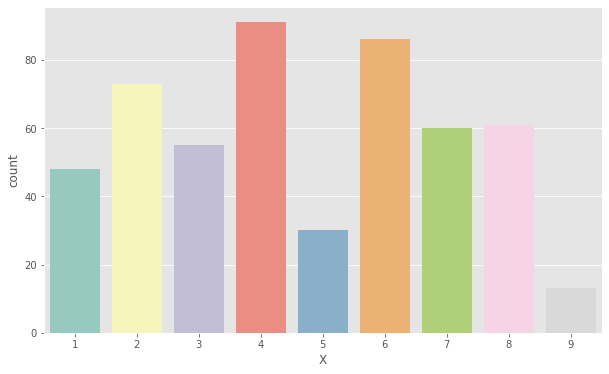

In [10]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='X', palette='Set3')
plt.show()

### Y Feature

In [11]:
df.Y.value_counts()

4    203
5    125
6     74
3     64
2     44
9      6
8      1
Name: Y, dtype: int64

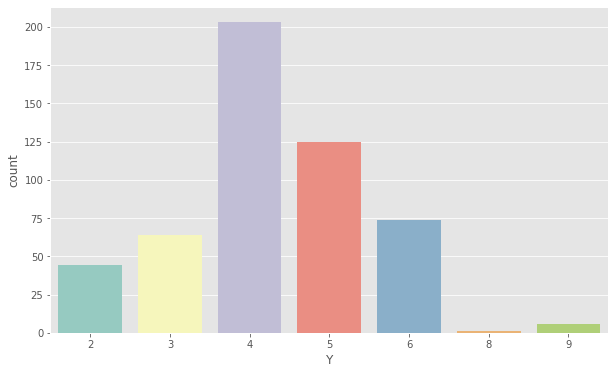

In [12]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Y', palette='Set3')
plt.show()

### Day Feature

In [13]:
df.day.value_counts()

sun    95
fri    85
sat    84
mon    74
tue    64
thu    61
wed    54
Name: day, dtype: int64

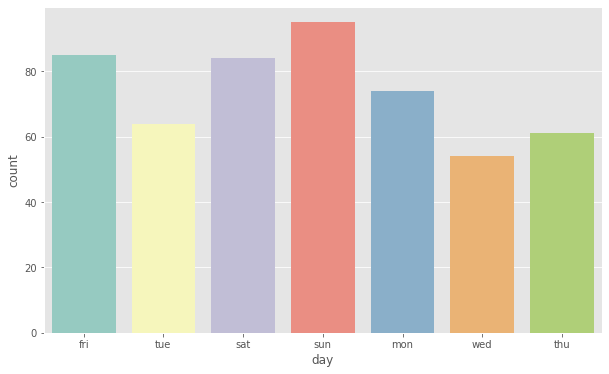

In [14]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='day', palette='Set3')
plt.show()

### Month Feature

In [15]:
df.month.value_counts()

aug    184
sep    172
mar     54
jul     32
feb     20
jun     17
oct     15
apr      9
dec      9
jan      2
may      2
nov      1
Name: month, dtype: int64

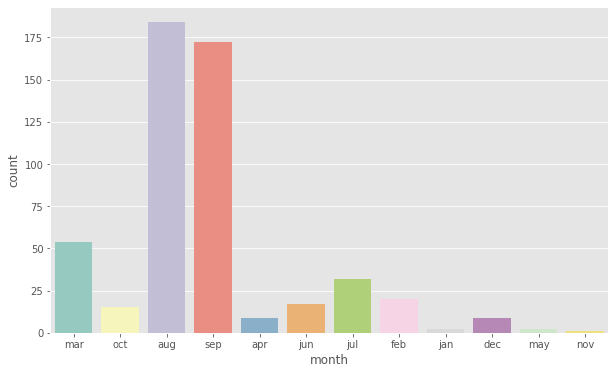

In [16]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='month', palette='Set3')
plt.show()

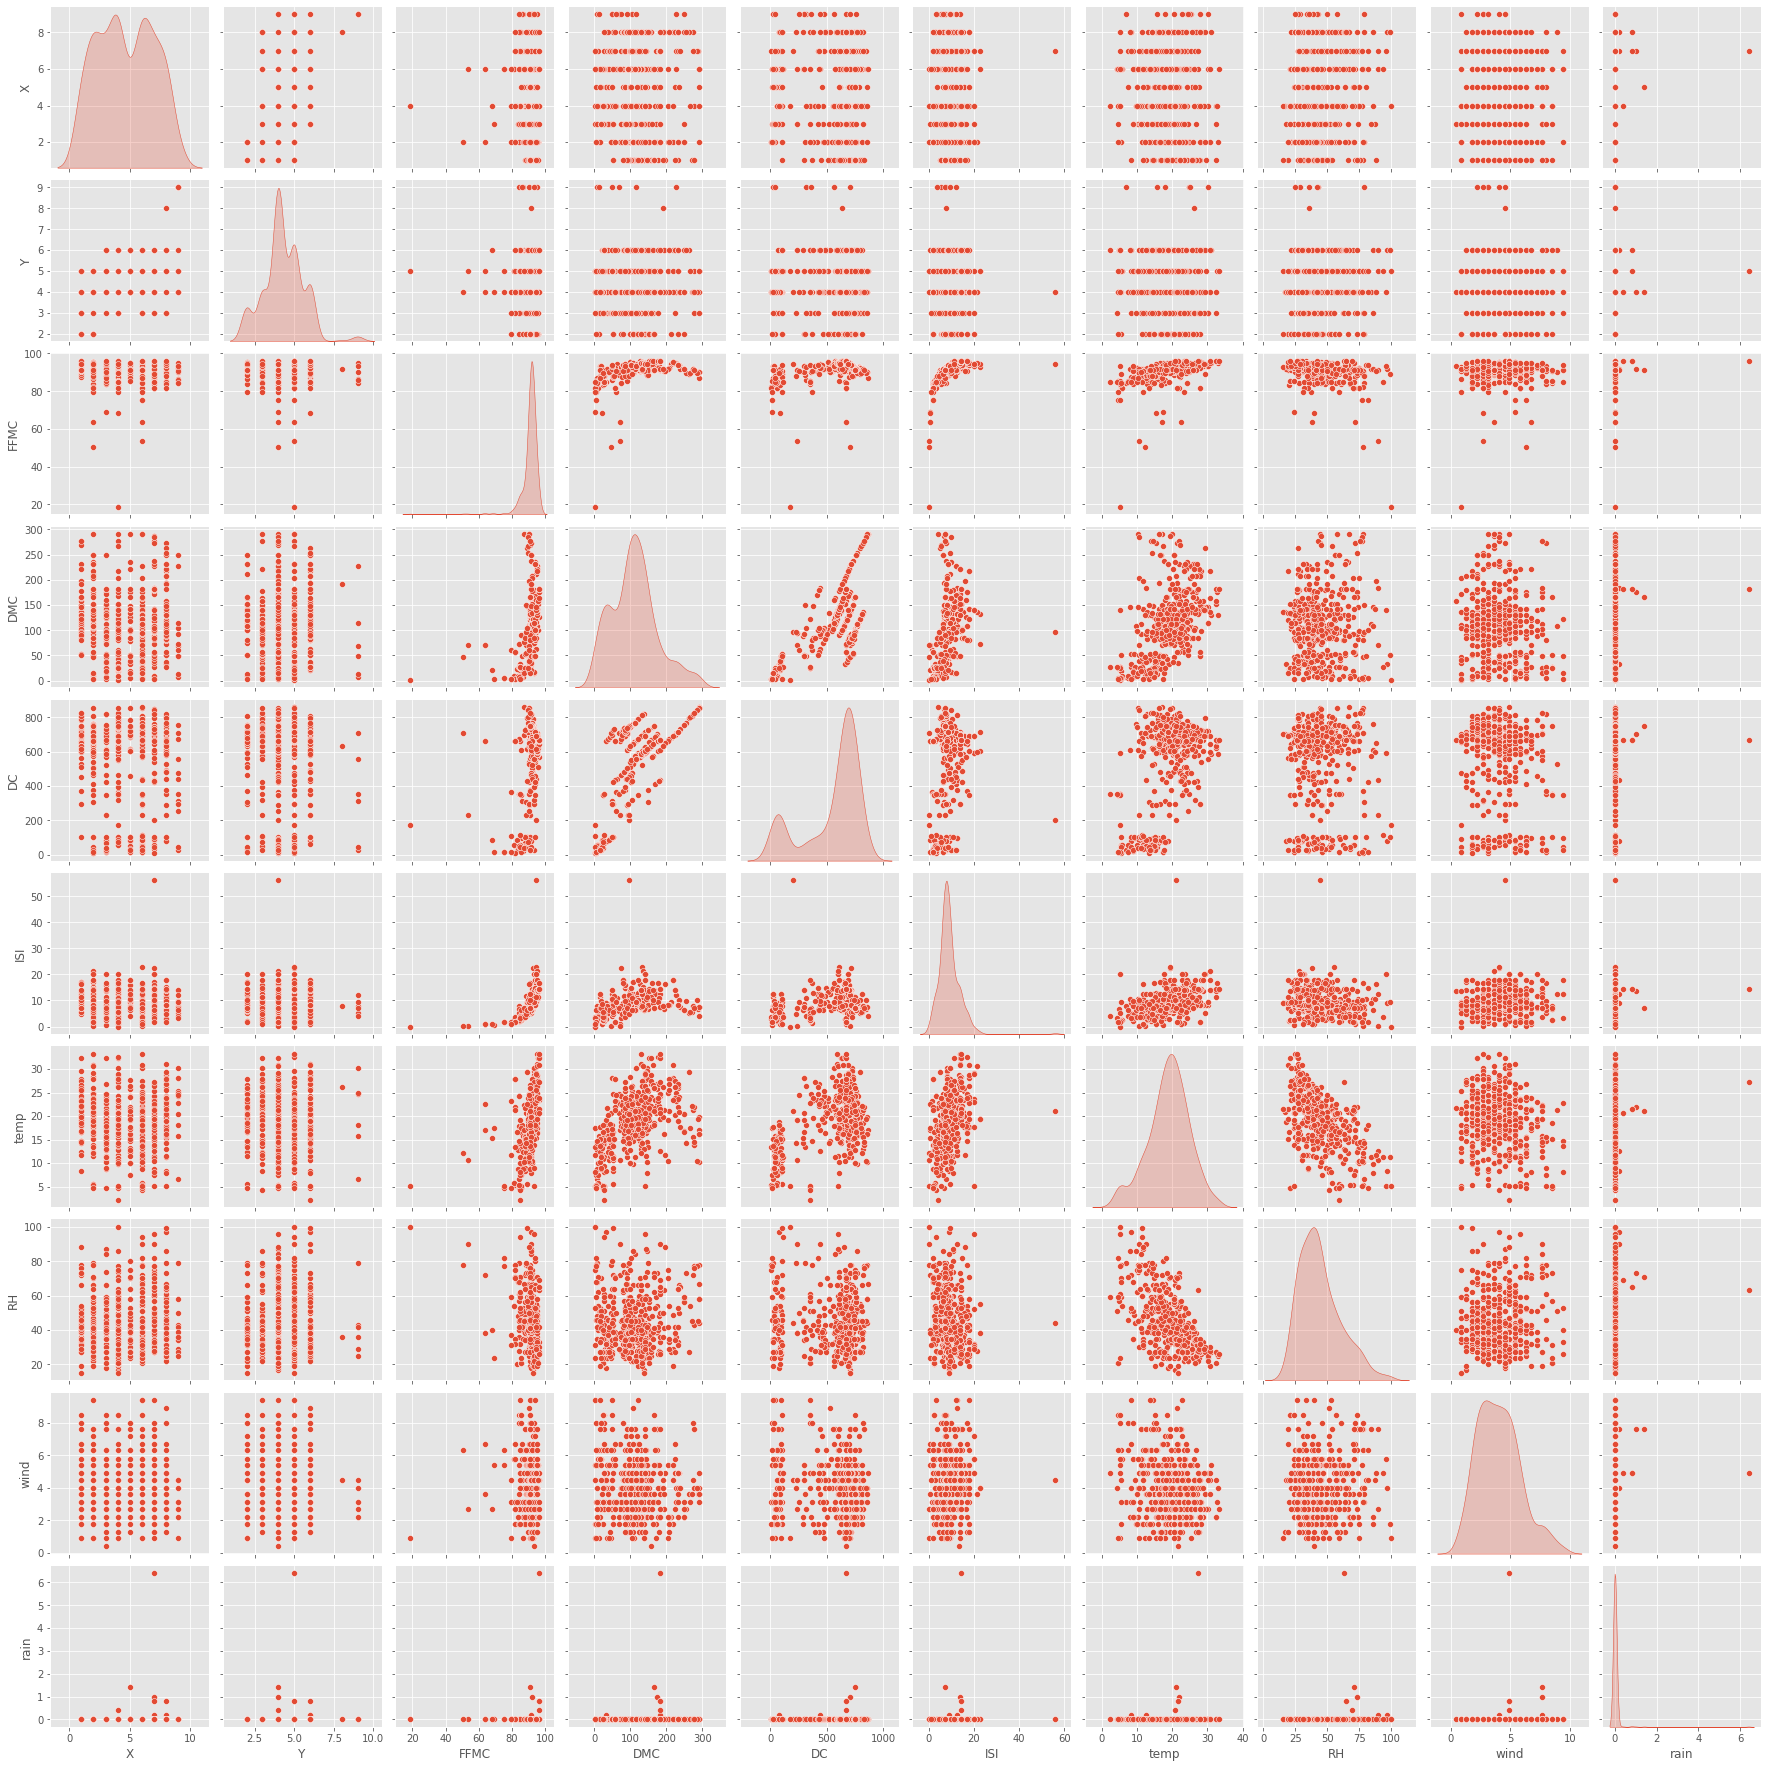

In [17]:
sns.pairplot(df.drop('area', axis=1), diag_kind='kde')
plt.show()

# Data Preparation

## Encode Day and Month

In [18]:
df = pd.get_dummies(df, columns=['day'], prefix='', prefix_sep='')
df = pd.get_dummies(df, columns=['month'], prefix='', prefix_sep='')

## Split data

In [19]:
train_dataset = df.sample(frac=0.8, random_state=0)
test_dataset = df.drop(train_dataset.index)

In [20]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('area')
test_labels = test_features.pop('area')

## Create Normalizer

In [21]:
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(np.array(train_features)) # Fit Normalizer

# Building Model

In [22]:
# Plot Function
def plot_loss(history):
  plt.figure(figsize=(10,6))
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 20])
  plt.xlabel('Epoch')
  plt.ylabel('Error [MPG]')
  plt.legend()
  plt.grid(True)

# First Experiment
Experiment pertama dengan mencoba jumlah hidden layer yang ditrain

### First try with no hidden layer

In [23]:
def first_model(norm):
    model = tf.keras.Sequential([
        norm,
        layers.Dense(12, activation='relu'),
        layers.Dense(1, activation='linear')
    ])

    model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam())

    return model

In [24]:
first_try = first_model(normalizer)

In [25]:
%%time
history = first_try.fit(
    train_features,
    train_labels,
    epochs=1000,
    verbose=0,
    # Calculate validation results on 20% of the training data.
    validation_split = 0.2)

Wall time: 45.7 s


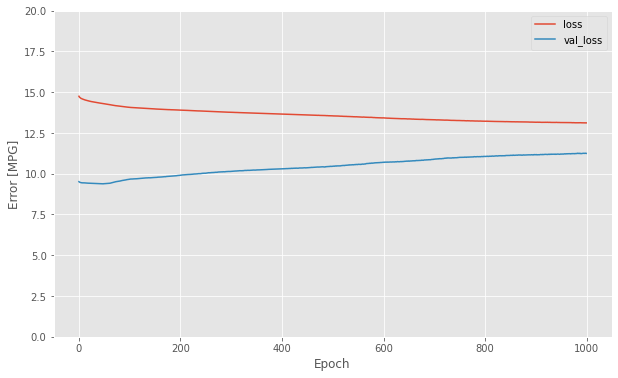

In [26]:
plot_loss(history)

### Second Try

In [27]:
def second_model(norm):
    model = tf.keras.Sequential([
        norm,
        layers.Dense(32, activation='relu', kernel_initializer='normal'),
        layers.Dense(64, activation='relu', kernel_initializer='normal'),
        layers.Dense(64, activation='relu', kernel_initializer='normal'),
        layers.Dense(64, activation='relu', kernel_initializer='normal'),
        layers.Dense(128, activation='relu', kernel_initializer='normal'),
        layers.Dropout(0.3),
        layers.Dense(1, activation='linear')
    ])

    model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam())

    return model

In [28]:
second_try = second_model(normalizer)
second_try.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 29)               59        
 n)                                                              
                                                                 
 dense_2 (Dense)             (None, 32)                960       
                                                                 
 dense_3 (Dense)             (None, 64)                2112      
                                                                 
 dense_4 (Dense)             (None, 64)                4160      
                                                                 
 dense_5 (Dense)             (None, 64)                4160      
                                                                 
 dense_6 (Dense)             (None, 128)               8320      
                                                      

In [29]:
%%time
history = second_try.fit(
    train_features,
    train_labels,
    epochs=1000,
    verbose=0,
    # Calculate validation results on 20% of the training data.
    validation_split = 0.2)

Wall time: 54.1 s


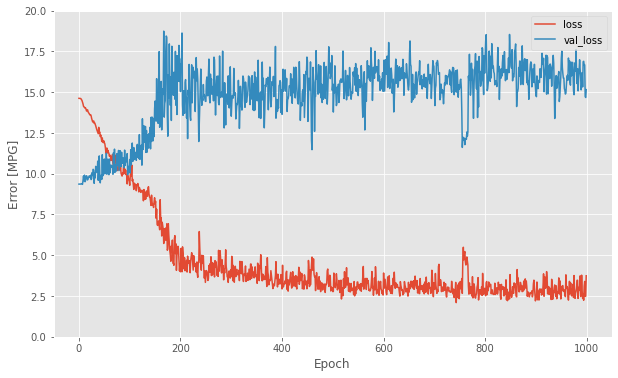

In [30]:
plot_loss(history)

### Third Try

In [31]:
def third_model(norm):
    model = tf.keras.Sequential([
        norm,
        layers.Dense(16, activation='relu', kernel_initializer='he_normal'),
        layers.Dense(32, activation='relu', kernel_initializer='he_normal'),
        layers.Dense(32, activation='relu', kernel_initializer='he_normal'),
        layers.Dense(64, activation='relu', kernel_initializer='he_normal'),
        layers.Dense(64, activation='relu', kernel_initializer='he_normal'),
        layers.Dense(64, activation='relu', kernel_initializer='he_normal'),
        layers.Dropout(0.5),
        layers.Dense(128, activation='relu', kernel_initializer='he_normal'),
        layers.Dense(1, activation='linear')
    ])

    model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam())

    return model

In [32]:
third_try = third_model(normalizer)
third_try.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 29)               59        
 n)                                                              
                                                                 
 dense_8 (Dense)             (None, 16)                480       
                                                                 
 dense_9 (Dense)             (None, 32)                544       
                                                                 
 dense_10 (Dense)            (None, 32)                1056      
                                                                 
 dense_11 (Dense)            (None, 64)                2112      
                                                                 
 dense_12 (Dense)            (None, 64)                4160      
                                                      

In [33]:
%%time
history = third_try.fit(
    train_features,
    train_labels,
    epochs=1000,
    verbose=0,
    # Calculate validation results on 20% of the training data.
    validation_split = 0.2)

Wall time: 51.2 s


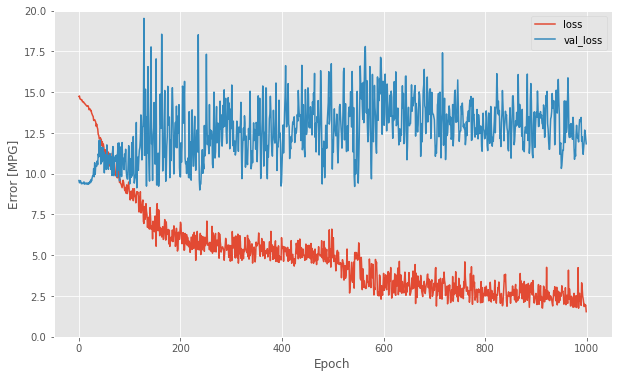

In [34]:
plot_loss(history)

> Kesimpulan :
1. semakin banyak neuron atau hidden layer model lebih mengalami penurunan eror atau loss
2. saya akan mengambil model yang ketiga

## Second Experiment
Experiment kedua dilakukan dengan jumlah epoch pada training

In [35]:
# fit a model and plot learning curve

def fit_second_model(x_train, y_train, epoch, normalizer=normalizer):

    # define model
    model = tf.keras.Sequential([
        normalizer,
        layers.Dense(16, activation='relu', kernel_initializer='he_normal'),
        layers.Dense(32, activation='relu', kernel_initializer='he_normal'),
        layers.Dense(32, activation='relu', kernel_initializer='he_normal'),
        layers.Dense(64, activation='relu', kernel_initializer='he_normal'),
        layers.Dense(64, activation='relu', kernel_initializer='he_normal'),
        layers.Dense(64, activation='relu', kernel_initializer='he_normal'),
        layers.Dropout(0.5),
        layers.Dense(128, activation='relu', kernel_initializer='he_normal'),
        layers.Dense(1, activation='linear')
    ])
    
    model.compile(loss='mean_absolute_error', optimizer=tf.keras.optimizers.Adam())

    # fit model
    history = model.fit(
        x_train,
        y_train,
        epochs=epoch,
        verbose=0,
        validation_split = 0.2)
    
    # plot learning curves
    plt.plot(history.history['loss'], label='train')
    plt.plot(history.history['val_loss'], label='test')
    plt.title('epoch='+str(epoch))
    plt.ylim([0, 20])
    plt.legend()

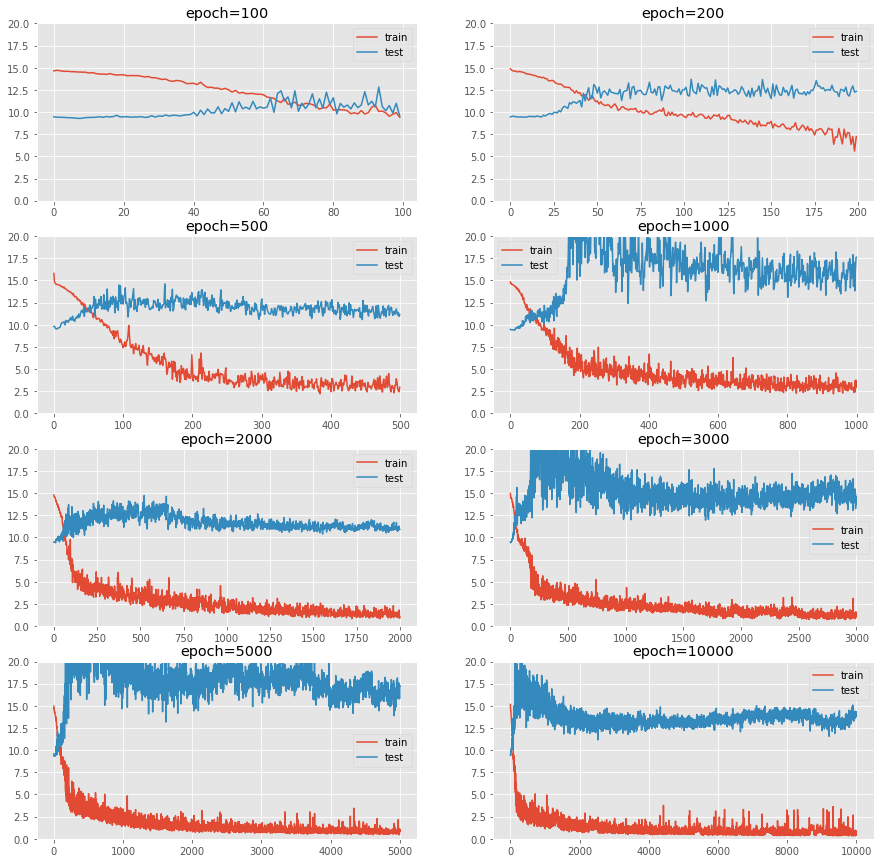

In [36]:
# create learning curves for different Epoch

epoch = [100, 200, 500, 1000, 2000, 3000, 5000, 10000]


plt.figure(figsize=(15, 15))
for i in range(len(epoch)):
    
    # determine the plot number
    plot_no = 420 + (i+1)
    plt.subplot(plot_no)
    
    # fit model and plot learning curves for a learning rate
    fit_second_model(train_features, train_labels, epoch[i])

# show learning curves
plt.show()

> Kesimpulan :
1. Epoch yang banyak tidak akan selalu membuat model mengalami penurunan eror atau loss
2. saya akan menggunakan epoch sebesar 500 untuk masalah komputasi dan dilihat tidak terlalu jauh dengan epoch diatasnya

## Third Experiment

In [39]:
# fit a model and plot learning curve

def fit_third_model(x_train, y_train, bs, normalizer=normalizer):

    # define model
    model = tf.keras.Sequential([
        normalizer,
        layers.Dense(16, activation='relu', kernel_initializer='he_normal'),
        layers.Dense(32, activation='relu', kernel_initializer='he_normal'),
        layers.Dense(32, activation='relu', kernel_initializer='he_normal'),
        layers.Dense(64, activation='relu', kernel_initializer='he_normal'),
        layers.Dense(64, activation='relu', kernel_initializer='he_normal'),
        layers.Dense(64, activation='relu', kernel_initializer='he_normal'),
        layers.Dropout(0.5),
        layers.Dense(128, activation='relu', kernel_initializer='he_normal'),
        layers.Dense(1, activation='linear')
    ])
    
    model.compile(loss='mean_absolute_error', optimizer=tf.keras.optimizers.Adam())

    # fit model
    epoch = 500
    history = model.fit(
        x_train,
        y_train,
        epochs=epoch,
        verbose=0,
        batch_size=bs,
        validation_split = 0.2)
    
    # plot learning curves
    plt.plot(history.history['loss'], label='train')
    plt.plot(history.history['val_loss'], label='test')
    plt.title('batchs_size='+str(bs))
    plt.ylim([0, 20])
    plt.legend()

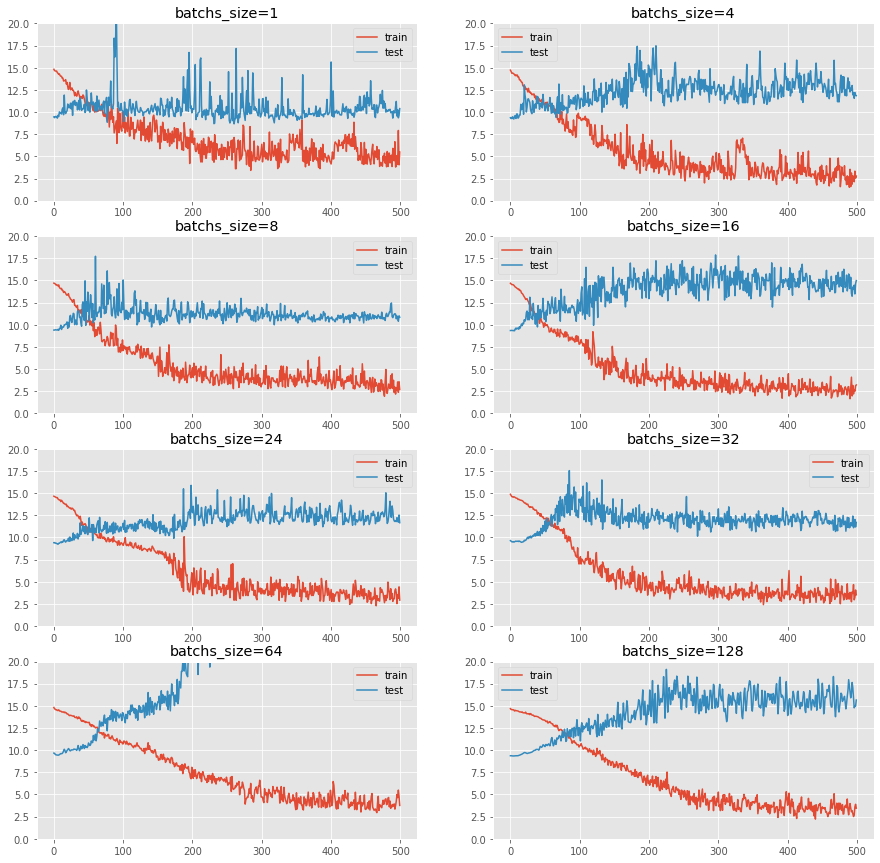

In [40]:
# create learning curves for different Batch Size

bs = [1, 4, 8, 16, 24, 32, 64, 128]


plt.figure(figsize=(15, 15))
for i in range(len(bs)):
    
    # determine the plot number
    plot_no = 420 + (i+1)
    plt.subplot(plot_no)
    
    # fit model and plot learning curves for a learning rate
    fit_third_model(train_features, train_labels, bs[i])

# show learning curves
plt.show()

> Kesimpulan :
1. semakin banyak batch membuat GAP antara loss train dan loss test sangat jauh
2. saya akan mengambil GAP yang paling kecil yaitu 1

## Fourth Experiment

In [44]:
# fit a model and plot learning curve

def fit_fourth_model(x_train, y_train, lr, normalizer=normalizer):

    # define model
    model = tf.keras.Sequential([
        normalizer,
        layers.Dense(16, activation='relu', kernel_initializer='he_normal'),
        layers.Dense(32, activation='relu', kernel_initializer='he_normal'),
        layers.Dense(32, activation='relu', kernel_initializer='he_normal'),
        layers.Dense(64, activation='relu', kernel_initializer='he_normal'),
        layers.Dense(64, activation='relu', kernel_initializer='he_normal'),
        layers.Dense(64, activation='relu', kernel_initializer='he_normal'),
        layers.Dropout(0.5),
        layers.Dense(128, activation='relu', kernel_initializer='he_normal'),
        layers.Dense(1, activation='linear')
    ])
    
    model.compile(loss='mean_absolute_error', optimizer=tf.keras.optimizers.Adam(learning_rate=lr))

    # fit model
    epoch = 500
    bs = 1
    history = model.fit(
        x_train,
        y_train,
        epochs=epoch,
        verbose=0,
        batch_size=bs,
        validation_split = 0.2)
    
    # plot learning curves
    plt.plot(history.history['loss'], label='train')
    plt.plot(history.history['val_loss'], label='test')
    plt.title('learning_rate='+str(lr))
    plt.ylim([0, 20])
    plt.legend()

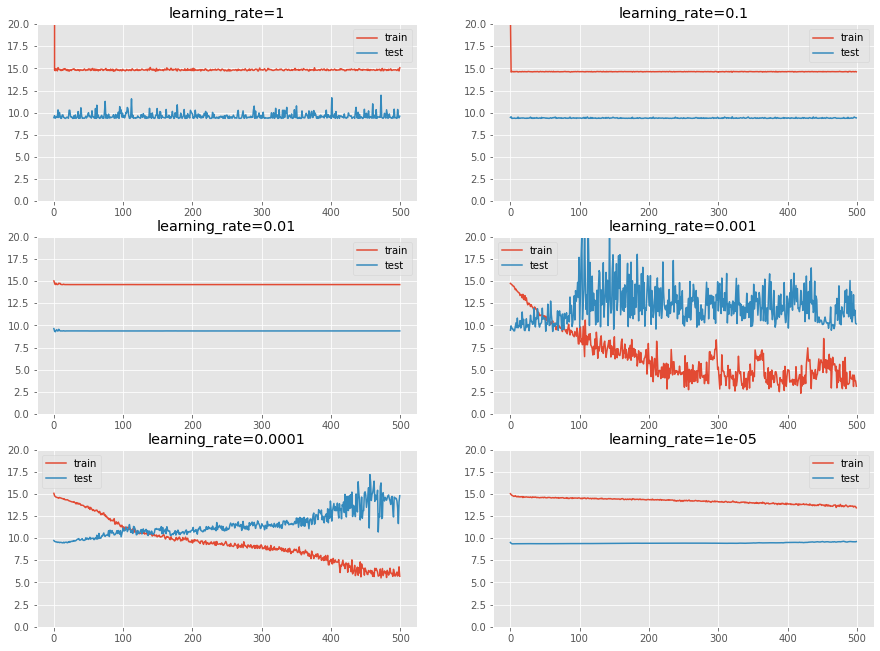

In [45]:
# create learning curves for different Batch Size

lr = [1, 0.1, 0.01, 0.001, 0.0001, 0.00001]


plt.figure(figsize=(15, 15))
for i in range(len(lr)):
    
    # determine the plot number
    plot_no = 420 + (i+1)
    plt.subplot(plot_no)
    
    # fit model and plot learning curves for a learning rate
    fit_fourth_model(train_features, train_labels, lr[i])

# show learning curves
plt.show()

> Kesimpulan :


## Result Model
Kesimpulan berdasarkan experiment diatas

In [46]:
def best_model(norm):
    model = tf.keras.Sequential([
        norm,
        layers.Dense(32, activation='relu', kernel_initializer='normal'),
        layers.Dense(64, activation='relu', kernel_initializer='normal'),
        layers.Dense(64, activation='relu', kernel_initializer='normal'),
        layers.Dense(64, activation='relu', kernel_initializer='normal'),
        layers.Dense(128, activation='relu', kernel_initializer='normal'),
        layers.Dropout(0.5),
        layers.Dense(128, activation='relu', kernel_initializer='normal'),
        layers.Dense(1, activation='linear')
    ])

    model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001))

    return model

In [47]:
best_build = best_model(normalizer)
best_build.summary()

Model: "sequential_33"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 29)               59        
 n)                                                              
                                                                 
 dense_256 (Dense)           (None, 32)                960       
                                                                 
 dense_257 (Dense)           (None, 64)                2112      
                                                                 
 dense_258 (Dense)           (None, 64)                4160      
                                                                 
 dense_259 (Dense)           (None, 64)                4160      
                                                                 
 dense_260 (Dense)           (None, 128)               8320      
                                                     

In [49]:
%%time
history = best_build.fit(
    train_features,
    train_labels,
    epochs=500,
    verbose=0,
    batch_size=1,
    # Calculate validation results on 20% of the training data.
    validation_split = 0.2)

Wall time: 7min 4s


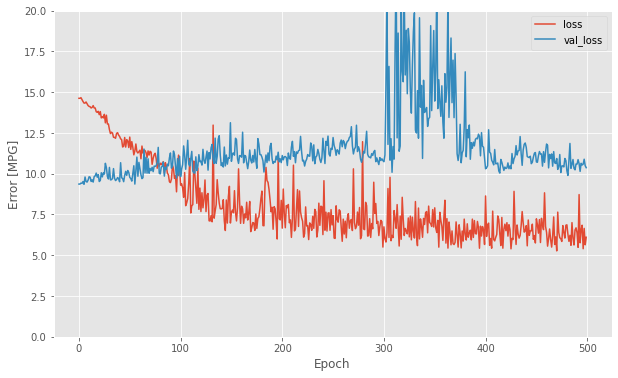

In [50]:
plot_loss(history)

## Final Model
Menggunakan Callback (EarlyStoping)

In [51]:
def final_model(norm):
    model = tf.keras.Sequential([
        norm,
        layers.Dense(32, activation='relu', kernel_initializer='normal'),
        layers.Dense(64, activation='relu', kernel_initializer='normal'),
        layers.Dense(64, activation='relu', kernel_initializer='normal'),
        layers.Dense(64, activation='relu', kernel_initializer='normal'),
        layers.Dense(128, activation='relu', kernel_initializer='normal'),
        layers.Dropout(0.5),
        layers.Dense(128, activation='relu', kernel_initializer='normal'),
        layers.Dense(1, activation='linear')
    ])

    model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001))

    return model

In [53]:
final_build_model = final_model(normalizer)
final_build_model.summary()

Model: "sequential_35"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 29)               59        
 n)                                                              
                                                                 
 dense_270 (Dense)           (None, 32)                960       
                                                                 
 dense_271 (Dense)           (None, 64)                2112      
                                                                 
 dense_272 (Dense)           (None, 64)                4160      
                                                                 
 dense_273 (Dense)           (None, 64)                4160      
                                                                 
 dense_274 (Dense)           (None, 128)               8320      
                                                     

In [55]:
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=200)

In [59]:
%%time
history = final_build_model.fit(
    train_features,
    train_labels,
    epochs=500,
    verbose=0,
      batch_size=1,
    # Calculate validation results on 20% of the training data.
    validation_split = 0.2,
    callbacks=[es])

Epoch 00365: early stopping
Wall time: 5min 6s


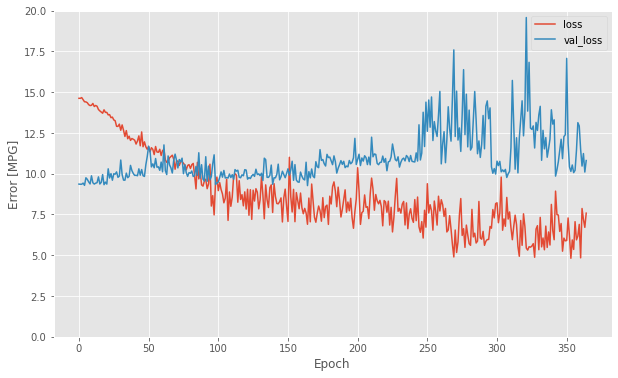

In [60]:
plot_loss(history)

### Prediction

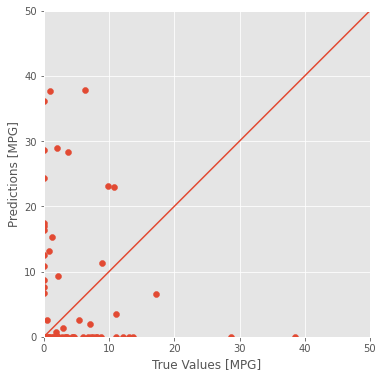

In [61]:
test_predictions = final_build_model.predict(test_features).flatten()

plt.figure(figsize=(10,6))
a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
lims = [0, 50]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

In [62]:
final_build_model.save('best_model')

INFO:tensorflow:Assets written to: best_model\assets
